# Stable Diffusion Pipeline

In [1]:
import sys

import diffusers
import matplotlib.pyplot as plt
import torch
import transformers
from IPython.display import display
from PIL import Image
from torchinfo import summary
from tqdm.notebook import tqdm

In [2]:
if torch.cuda.is_available():
    device = "cuda"
    dtype = torch.float16
else:
    device = "cpu"
    dtype = torch.float32

print(f"Using {device} device with {dtype} data type.")

Using cpu device with torch.float32 data type.


In [3]:
prompt = "A red bird flies through a blue sky over a green tree."

In [4]:
pipeline = diffusers.StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", torch_dtype=dtype
)
pipeline.to(device)

print(pipeline)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Asus\.cache\huggingface\hub\models--CompVis--stable-diffusion-v1-4. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.33.1",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}



  0%|          | 0/50 [00:00<?, ?it/s]

StableDiffusionPipelineOutput(images=[<PIL.Image.Image image mode=RGB size=512x512 at 0x20BB86C4140>], nsfw_content_detected=[False])
1


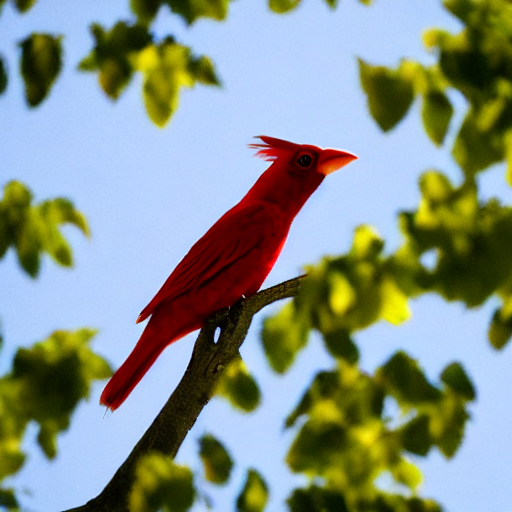

In [5]:
res = pipeline(prompt)

print(res)
print(len(res.images))
# Display the first (and only, in this case) image
display(res.images[0])

Generate Images:

In [ ]:
# Create a list containing the prompt four times and pass it to the pipeline.
images = pipeline([prompt] * 2).images

for im in images:
    display(im)

Guidance Scale

In [ ]:
small_guidance = pipeline(prompt, guidance_rescale=2).images[0]
large_guidance = pipeline(prompt, guidance_rescale=25).images[0]

print("Small guidance")
display(small_guidance)
print("Large guidance")
display(large_guidance)

Pipeline Steps: Run the pipeline with only a few (10) and with many (250) steps.

In [ ]:
few_steps = pipeline(prompt, num_inference_steps=10).images[0]
many_steps = pipeline(prompt, num_inference_steps=250).images[0]

print("Few steps")
display(few_steps)
print("Many steps")
display(many_steps)

These models tend to be trained on images from sites like Flickr and DeviantArt. The text descriptions are assembled from summaries, comments, and tags assigned to the images. That last component means that the training descriptions often consist of a series of keywords, rather than a coherent paragraph about the image.

Our prompts will perform best when they resemble the training data. Many people have had success by creating prompts that contain lists of keywords and tags that reflect the style they desire.

In [ ]:
styles = [
    # A cartoon in Studio Ghibli style
    "cartoon, animated, Studio Ghibli style, cute, Japanese animation",
    # A photograph on film suggests an artistic approach
    "photograph, film, 35 mm camera",
    # A computer rendering.  The "arguments" at the end don't directly
    # affect the image, but they make the model adjust the image to
    # look like images tagged with these arguments.
    "rendered in unreal engine, hyper-realistic, volumetric lighting, --ar 9:16 --hd --q 2",
    # A watercolor painting
    "painting, watercolors, pastel, composition",
    # more
    "painting, watercolors, pastel, composition",
]

In [ ]:
styled_prompt = f"{prompt} {styles[0]}"
image = pipeline(styled_prompt).images[0]

print(styled_prompt)
display(image)